In [1]:
###### Anderson Marcos Dias Canteli ######
### The Puzzle in a Mug Project ###


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from platform import python_version
print(python_version())

3.7.9


In [3]:
df = pd.read_csv('mario_kart_64.csv', delimiter=';')
df

,Personagem,TimeTo30kmph_(s),TimeTo50kmph_(s),TopSpeed_(kmph),TimeToTopSpeed_(kmph),WeightClass
0,Mario,2.1,3.3,68,5.1,Medium
1,Luigi,1.8,3.5,68,5.3,Medium
2,Peach,1.1,2.0,68,3.8,Light
3,Toad,0.8,2.2,66,3.8,Light
4,Yoshi,1.0,2.4,66,3.2,Light
5,Donkey Kong,2.0,2.6,70,4.2,Heavy
6,Wario,2.0,2.7,70,4.0,Heavy
7,Bowser,2.1,2.5,70,3.5,Heavy


In [4]:
df_scaled = df.drop(['Personagem', 'WeightClass'], axis=1)
df_scaled

,TimeTo30kmph_(s),TimeTo50kmph_(s),TopSpeed_(kmph),TimeToTopSpeed_(kmph)
0,2.1,3.3,68,5.1
1,1.8,3.5,68,5.3
2,1.1,2.0,68,3.8
3,0.8,2.2,66,3.8
4,1.0,2.4,66,3.2
5,2.0,2.6,70,4.2
6,2.0,2.7,70,4.0
7,2.1,2.5,70,3.5


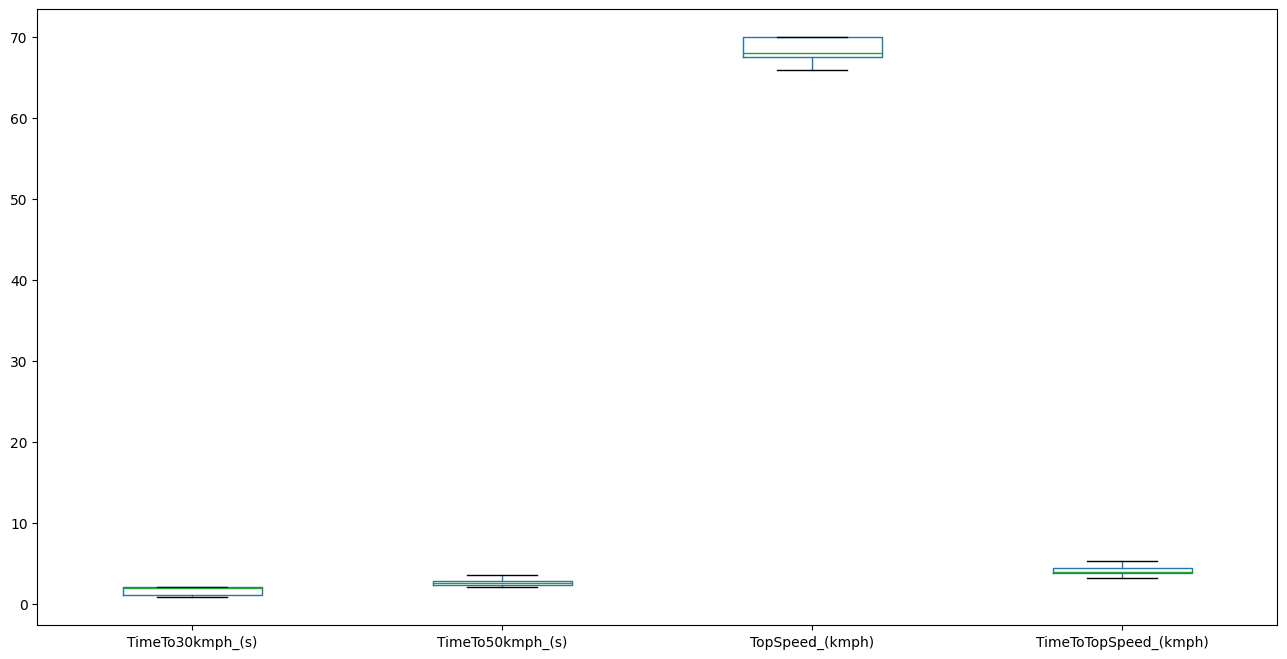

In [5]:
plt.figure(figsize=(16,8))
df_scaled.boxplot()
plt.grid(False)
plt.show()

In [6]:
df_scaled.describe()

,TimeTo30kmph_(s),TimeTo50kmph_(s),TopSpeed_(kmph),TimeToTopSpeed_(kmph)
count,8.000000,8.000000,8.000000,8.000000
mean,1.612500,2.650000,68.250000,4.112500
std,0.548862,0.515475,1.669046,0.737636
min,0.800000,2.000000,66.000000,3.200000
25%,1.075000,2.350000,67.500000,3.725000
50%,1.900000,2.550000,68.000000,3.900000
75%,2.025000,2.850000,70.000000,4.425000
max,2.100000,3.500000,70.000000,5.300000


In [7]:
n_individuals = df_scaled.shape[0]
n_variables = df_scaled.shape[1]
column_names = df_scaled.columns.values.tolist()


for j in range(n_variables):
    mean = df_scaled[column_names[j]].mean()
    std = df_scaled[column_names[j]].std(ddof=1)
    for i in range(n_individuals):
        df_scaled.loc[i,column_names[j]] = (df_scaled.loc[i,column_names[j]] - mean)/std

In [8]:
df_scaled.describe()

,TimeTo30kmph_(s),TimeTo50kmph_(s),TopSpeed_(kmph),TimeToTopSpeed_(kmph)
count,8.000000e+00,8.000000e+00,8.000000,8.000000e+00
mean,-5.551115e-17,2.498002e-16,0.000000,1.110223e-16
std,1.000000e+00,1.000000e+00,1.000000,1.000000e+00
min,-1.480334e+00,-1.260973e+00,-1.348076,-1.237060e+00
25%,-9.792982e-01,-5.819877e-01,-0.449359,-5.253267e-01
50%,5.238106e-01,-1.939959e-01,-0.149786,-2.880824e-01
75%,7.515544e-01,3.879918e-01,1.048503,4.236506e-01
max,8.882007e-01,1.648965e+00,1.048503,1.609872e+00


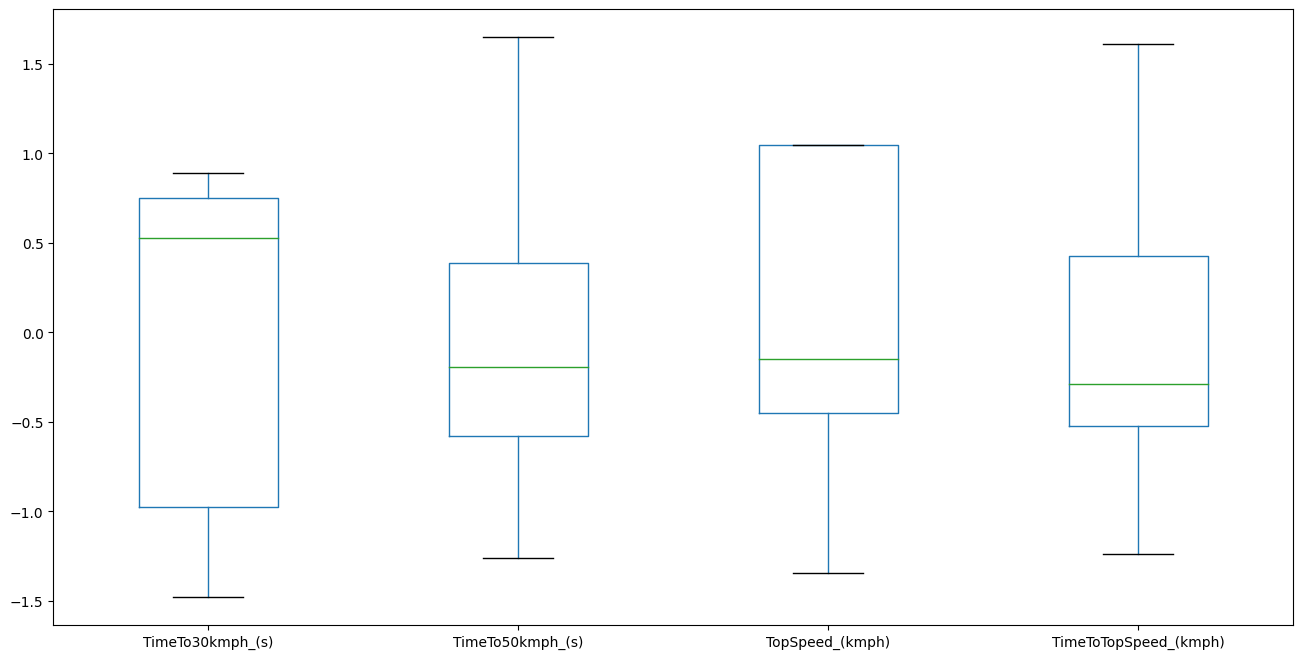

In [9]:
plt.figure(figsize=(16,8))
df_scaled.boxplot()
plt.grid(False)
plt.show()

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA()
pca.fit(df_scaled)

PCA()

In [12]:
# explained variance
for i in range(len(pca.explained_variance_)):
    print("Variance explained by PC" + str(i + 1) + " = " + "{:.3f}".format(pca.explained_variance_[i]))


Variance explained by PC1 = 2.606
Variance explained by PC2 = 1.208
Variance explained by PC3 = 0.163
Variance explained by PC4 = 0.023


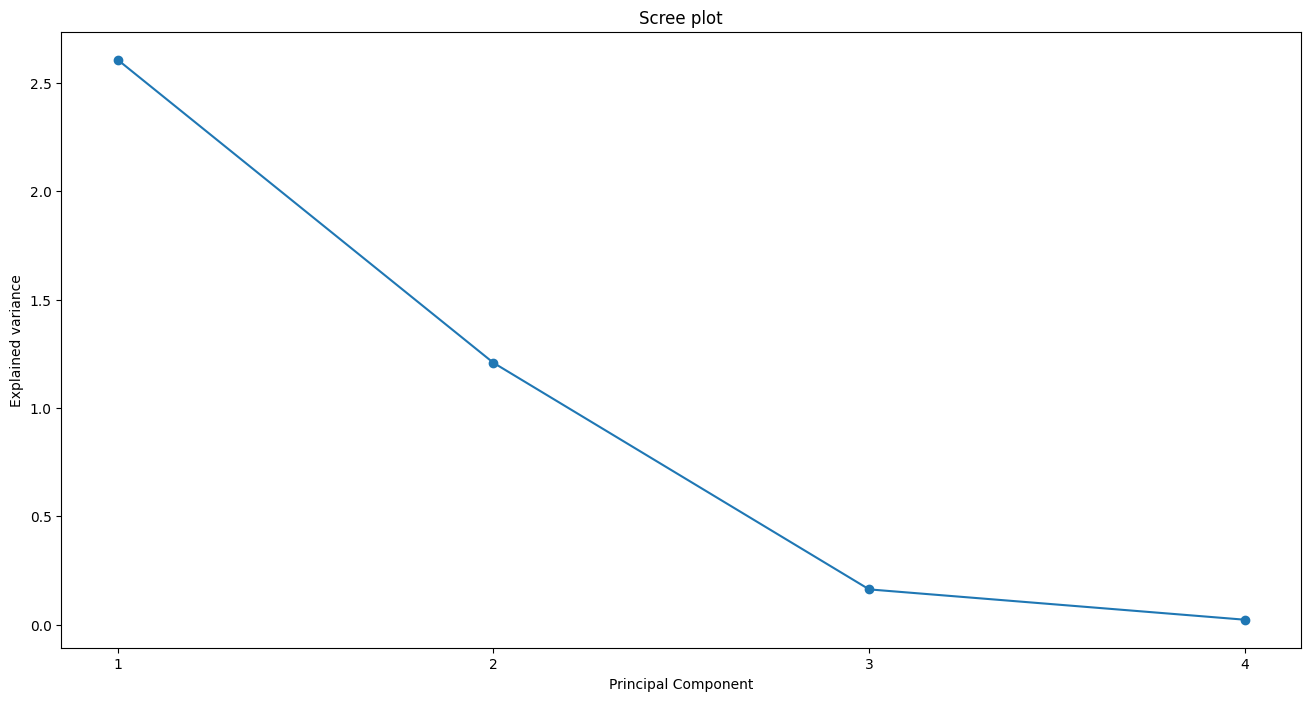

In [13]:
# explainde variance plot
plt.figure(figsize=(16,8))
plt.plot(np.arange(1,len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o')
plt.xticks(np.arange(1,len(pca.explained_variance_) + 1))
plt.xlabel("Principal Component")
plt.ylabel("Explained variance")
plt.title("Scree plot")
plt.show()

In [14]:
# explained variance ratio
for i in range(len(pca.explained_variance_)):
    print("Variance explained (%) by PC" + str(i + 1) + " = " + "{:.2f}".format(pca.explained_variance_ratio_[i]*100))

Variance explained (%) by PC1 = 65.15
Variance explained (%) by PC2 = 30.20
Variance explained (%) by PC3 = 4.07
Variance explained (%) by PC4 = 0.57


In [15]:
# The equations

pcs = []
for i in range(1, len(pca.components_)+1):
    pcs.append("PC" + str(i))

df_weights = pd.DataFrame(pca.components_, columns=column_names)
df_weights.insert(0,"Principal Component", pcs, True)
df_weights

,Principal Component,TimeTo30kmph_(s),TimeTo50kmph_(s),TopSpeed_(kmph),TimeToTopSpeed_(kmph)
0,PC1,-0.564544,-0.532286,-0.396778,-0.490437
1,PC2,0.340667,-0.416185,0.683548,-0.493456
2,PC3,0.340696,0.533969,-0.344792,-0.692764
3,PC4,0.670196,-0.508269,-0.506407,0.189874


In [16]:
# print the equations

for j in range(df_weights.shape[0]):

    equation = []
    for i in range(df_weights.shape[1]):
        if i == 0:
            equation = df_weights.loc[j][i] + " = "
        elif i < df_weights.shape[1] - 1:
            equation = equation + column_names[i-1] + "*(" + "{:.3f}".format(df_weights.loc[j][i]) + ") + "
        else:
            equation = equation + column_names[i-1] + "*(" + "{:.3f}".format(df_weights.loc[j][i]) + ")"
    print(equation)
    print("")


PC1 = TimeTo30kmph_(s)*(-0.565) + TimeTo50kmph_(s)*(-0.532) + TopSpeed_(kmph)*(-0.397) + TimeToTopSpeed_(kmph)*(-0.490)

PC2 = TimeTo30kmph_(s)*(0.341) + TimeTo50kmph_(s)*(-0.416) + TopSpeed_(kmph)*(0.684) + TimeToTopSpeed_(kmph)*(-0.493)

PC3 = TimeTo30kmph_(s)*(0.341) + TimeTo50kmph_(s)*(0.534) + TopSpeed_(kmph)*(-0.345) + TimeToTopSpeed_(kmph)*(-0.693)

PC4 = TimeTo30kmph_(s)*(0.670) + TimeTo50kmph_(s)*(-0.508) + TopSpeed_(kmph)*(-0.506) + TimeToTopSpeed_(kmph)*(0.190)



In [17]:
# The scores
scores = pca.transform(df_scaled)
df_scores = pd.DataFrame(scores, columns=pcs)
df_scores.insert(0,"Individuals",df['Personagem'],True)
df_scores

,Individuals,PC1,PC2,PC3,PC4
0,Mario,-1.769761,-0.985211,0.100145,0.284398
1,Luigi,-1.800687,-1.466684,-0.066732,-0.227644
2,Peach,1.465547,0.313368,-0.646311,0.010532
3,Toad,2.043051,-0.853400,-0.212194,0.053830
4,Yoshi,2.029740,-0.489360,0.682628,-0.053607
5,Donkey Kong,-0.821141,0.939049,-0.254953,0.014017
6,Wario,-0.791427,0.992105,0.036468,-0.136066
7,Bowser,-0.355323,1.550133,0.360949,0.054540


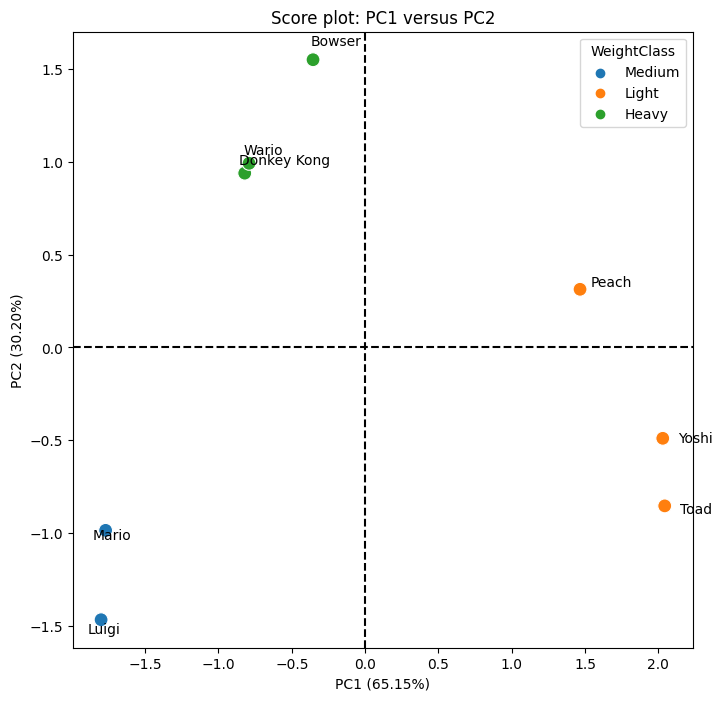

In [18]:
# The score plot
PC_x = 0 # 0 for the PC1
PC_y = 1 # 1 for the PC2

plt.figure(figsize=(8,8))
sns.scatterplot(x=scores[:,PC_x], y=scores[:,PC_y], hue=df['WeightClass'], s=100)
for i in range(scores.shape[0]):
    plt.text(scores[:,PC_x][i]*1.05, scores[:,PC_y][i]*1.05, df['Personagem'][i])

plt.xlabel("PC" + str(PC_x + 1) + " ({:.2f}".format(pca.explained_variance_ratio_[PC_x]*100) + "%)")    
plt.ylabel("PC" + str(PC_y + 1) + " ({:.2f}".format(pca.explained_variance_ratio_[PC_y]*100) + "%)")        
plt.title("Score plot: PC" + str(PC_x + 1) + " versus PC" + str(PC_y + 1))
plt.axhline(y=0, linestyle='--', c='k')
plt.axvline(x=0, linestyle='--', c='k')
plt.show()

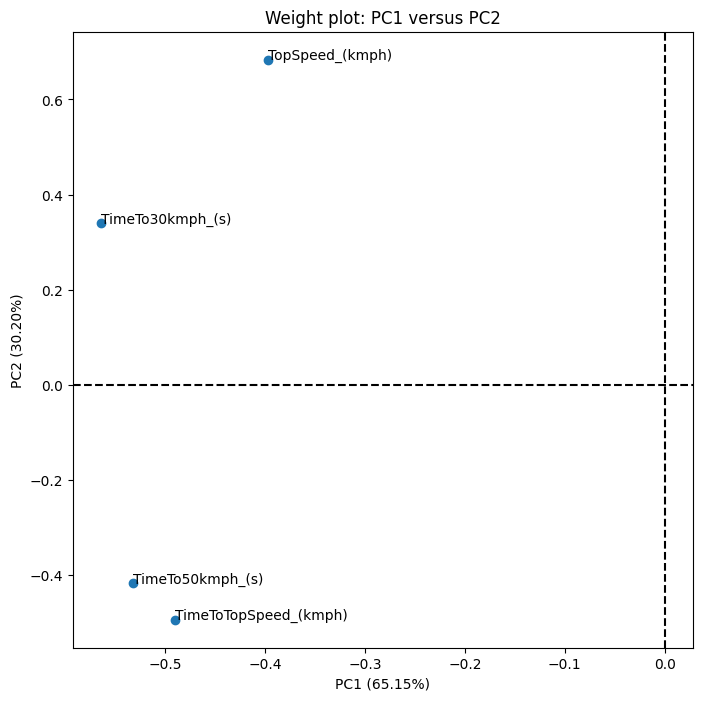

In [19]:
# The weight plot
weight = pca.components_
PC_x = 0
PC_y = 1


plt.figure(figsize=(8,8))
plt.scatter(weight[PC_x], weight[PC_y])

for i in range(len(column_names)):
    plt.text(weight[PC_x][i], weight[PC_y][i], column_names[i])
plt.xlabel("PC" + str(PC_x + 1) + " ({:.2f}".format(pca.explained_variance_ratio_[PC_x]*100) + "%)")    
plt.ylabel("PC" + str(PC_y + 1) + " ({:.2f}".format(pca.explained_variance_ratio_[PC_y]*100) + "%)")        
plt.title("Weight plot: PC" + str(PC_x + 1) + " versus PC" + str(PC_y + 1))
plt.axhline(y=0, linestyle='--', c='k')
plt.axvline(x=0, linestyle='--', c='k')
plt.show()




In [20]:
# The weight projections

sqrt_variances = np.sqrt(pca.explained_variance_)

covar = []
for i in range(len(pca.components_)):
    covar.append(pca.components_[i]*sqrt_variances[i])
df_covar = pd.DataFrame(covar, columns=column_names)
df_covar.insert(0,"PCs", pcs, True)
df_covar

,PCs,TimeTo30kmph_(s),TimeTo50kmph_(s),TopSpeed_(kmph),TimeToTopSpeed_(kmph)
0,PC1,-0.911378,-0.859303,-0.640544,-0.791742
1,PC2,0.374440,-0.457446,0.751315,-0.542377
2,PC3,0.137479,0.215470,-0.139132,-0.279547
3,PC4,0.101410,-0.076908,-0.076626,0.028731


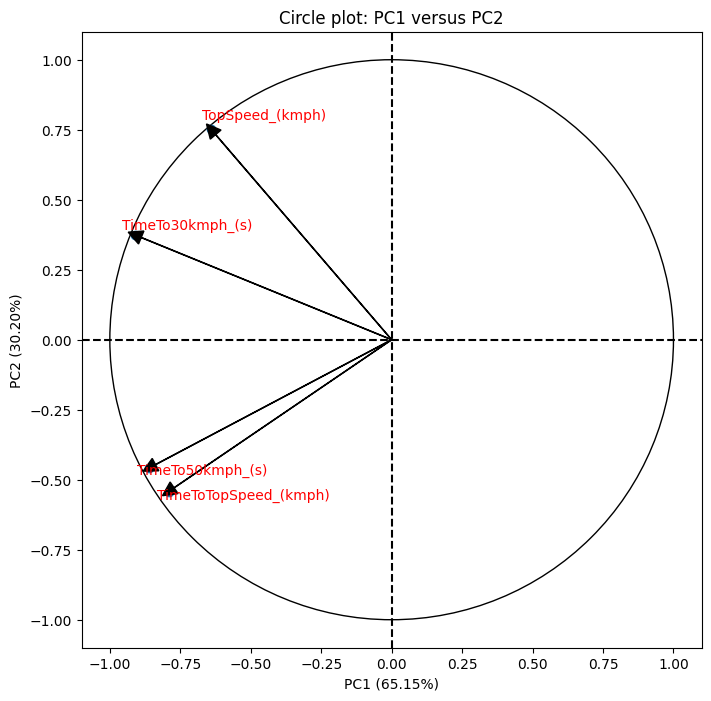

In [21]:
# The Circle plot

PC_x = 0
PC_y = 1

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
circ = plt.Circle((0,0), radius=1, fill=False)
ax.add_patch(circ)
plt.scatter(covar[PC_x],covar[PC_y])

for i in range(len(column_names)):
    
    plt.arrow(0,0,covar[PC_x][i]*.975,covar[PC_y][i]*.975, head_width=0.05,head_length=0.05, fc='k', ec='k')
    plt.text(covar[PC_x][i]*1.05, covar[PC_y][i]*1.05, column_names[i], c='r')
plt.xlabel("PC" + str(PC_x + 1) + " ({:.2f}".format(pca.explained_variance_ratio_[PC_x]*100) + "%)")    
plt.ylabel("PC" + str(PC_y + 1) + " ({:.2f}".format(pca.explained_variance_ratio_[PC_y]*100) + "%)")        
plt.title("Circle plot: PC" + str(PC_x + 1) + " versus PC" + str(PC_y + 1))
plt.axhline(y=0, linestyle='--', c='k')
plt.axvline(x=0, linestyle='--', c='k')

plt.show()


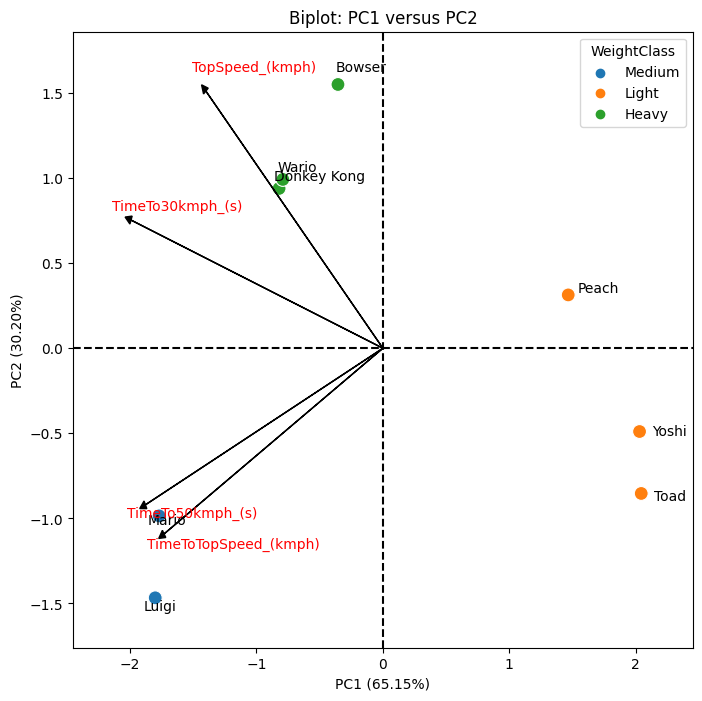

In [22]:
# The Biplot

PC_x = 0
PC_y = 1

# the score plot
plt.figure(figsize=(8,8))
sns.scatterplot(x=scores[:,PC_x], y=scores[:,PC_y], hue=df['WeightClass'], s = 100)

for i in range(n_individuals):
    plt.text(scores[:,PC_x][i]*1.05, scores[:,PC_y][i]*1.05, df['Personagem'][i])

# adapt the projections
x_max = np.abs(scores[:,PC_x]).max()
y_max = np.abs(scores[:,PC_y]).max()

covar_x_max = np.abs(covar[PC_x]).max()
covar_y_max = np.abs(covar[PC_y]).max()

arrow_rescaled_x = []
arrow_rescaled_y = []
for i in range(len(column_names)):
    arrow_rescaled_x.append(x_max*covar[PC_x][i]/covar_x_max)
    arrow_rescaled_y.append(y_max*covar[PC_y][i]/covar_y_max)

# the projections
for i in range(len(column_names)):
    
    plt.arrow(0,0,arrow_rescaled_x[i]*.975,arrow_rescaled_y[i]*.975, head_width=0.05,head_length=0.05, fc='k', ec='k')
    plt.text(arrow_rescaled_x[i]*1.05, arrow_rescaled_y[i]*1.05, column_names[i], c='r')

plt.xlabel("PC" + str(PC_x + 1) + " ({:.2f}".format(pca.explained_variance_ratio_[PC_x]*100) + "%)")    
plt.ylabel("PC" + str(PC_y + 1) + " ({:.2f}".format(pca.explained_variance_ratio_[PC_y]*100) + "%)")        
plt.title("Biplot: PC" + str(PC_x + 1) + " versus PC" + str(PC_y + 1))
plt.axhline(y=0, linestyle='--', c='k')
plt.axvline(x=0, linestyle='--', c='k')

x_minimum = min(min(arrow_rescaled_x), scores[:,PC_x].min())
x_maximum = max(max(arrow_rescaled_x), scores[:,PC_x].max())
plt.xlim(x_minimum*1.2, x_maximum*1.2)

y_minimum = min(min(arrow_rescaled_y), scores[:,PC_y].min())
y_maximum = max(max(arrow_rescaled_y), scores[:,PC_y].max())
plt.ylim(y_minimum*1.2, y_maximum*1.2)

# plt.savefig("biplot.png", dpi=100, bbox_inches='tight')

plt.show()



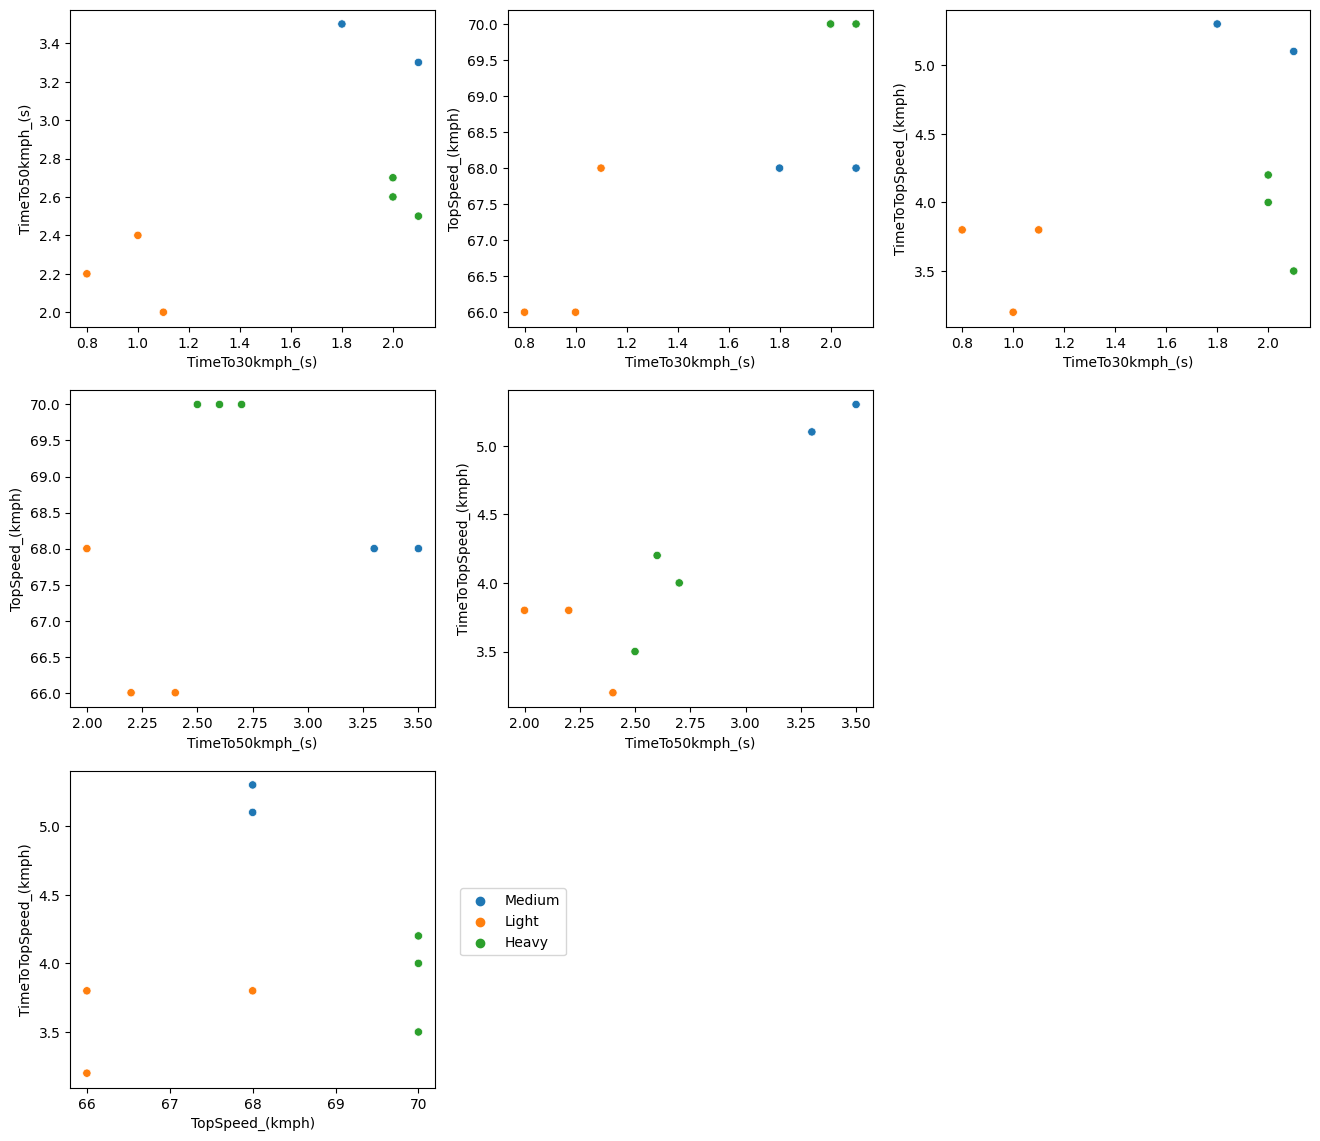

In [23]:
fig = plt.figure(figsize=(16,14))
plt.subplot(3,3,1)
sns.scatterplot(x=df['TimeTo30kmph_(s)'], y=df['TimeTo50kmph_(s)'], hue=df['WeightClass'], legend=False)
plt.subplot(3,3,2)
sns.scatterplot(x=df['TimeTo30kmph_(s)'], y=df['TopSpeed_(kmph)'], hue=df['WeightClass'], legend=False)
plt.subplot(3,3,3)
sns.scatterplot(x=df['TimeTo30kmph_(s)'], y=df['TimeToTopSpeed_(kmph)'], hue=df['WeightClass'], legend=False)
plt.subplot(3,3,4)
sns.scatterplot(x=df['TimeTo50kmph_(s)'], y=df['TopSpeed_(kmph)'], hue=df['WeightClass'], legend=False)
plt.subplot(3,3,5)
sns.scatterplot(x=df['TimeTo50kmph_(s)'], y=df['TimeToTopSpeed_(kmph)'], hue=df['WeightClass'], legend=False)
plt.subplot(3,3,7)
sns.scatterplot(x=df['TopSpeed_(kmph)'], y=df['TimeToTopSpeed_(kmph)'], hue=df['WeightClass'])
plt.legend(bbox_to_anchor=(1.05, 0.65))
plt.show()